# Credit RIsk
# MODELO DE EXAMEN - (t test examen anterior)



https://drive.google.com/file/d/18fuLcW2ZSi4gz_ENkDFpySuS5s53GNYf/view?usp=sharing

El conjunto de datos proporcionado representa información sobre riesgo crediticio generada por un banco internacional con operaciones en Argentina. Estos datos han sido transformados y enriquecidos para reflejar diferentes situaciones y comportamientos de pago de los clientes que podrían afectar la precisión de los modelos de predicción de riesgos. El ejercicio consiste en identificar y analizar posibles sesgos en variables clave del conjunto de datos, tales como la edad del cliente, el monto del préstamo y el tipo de empleo, utilizando métodos de estadística descriptiva, pruebas de hipótesis y visualizaciones.





**Parte 1: Comprensión y Preparación de Datos**

Explorar el conjunto de datos. Utiliza métodos descriptivos para obtener una comprensión general de las características del conjunto de datos (por ejemplo, .describe(), .info()).
Identificar valores atípicos. Genera estadísticas descriptivas y visualizaciones (boxplots, scatter plots) para identificar outliers en 'monto_del_prestamo'.

**Parte 2: Análisis Exploratorio de Datos**
Análisis de sesgos por edad.
Usa groupby para calcular la tasa de incumplimiento promedio por grupo de edad.
Crea histogramas de edad para deudores y no deudores.
Realiza un t-test para comparar las tasas de incumplimiento entre menores de edad y otros grupos de edad.
Análisis de sesgos por monto del préstamo.
Genera histogramas de 'monto_del_prestamo' para visualizar la distribución de los montos para deudores y no deudores.
Compara las distribuciones de 'monto_del_prestamo' entre buenos y malos pagadores con un t-test.
Análisis de sesgos por tipo de empleo.
Usa groupby para comparar las tasas de incumplimiento entre diferentes tipos de empleo.
Explora la relación entre el estado laboral y la tasa de incumplimiento con visualizaciones adecuadas.

**Parte 3: Preparación de Datos para Modelado**
Limpieza de Datos. Asegúrate de que todos los datos estén correctamente codificados y de que no haya valores faltantes o irrelevantes en el conjunto de datos.
Selección de Características. Decide qué variables incluir en el modelo. Considera excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

**Parte 4: Modelado**
Entrenar un Modelo de Clasificación. Utiliza DecisionTreeClassifier para entrenar un modelo predictivo con los datos procesados.
Evaluación del Modelo.
Genera una matriz de confusión para evaluar el rendimiento del modelo.
Calcula la precisión, el recall y la exactitud del modelo.



In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

In [2]:
df = pd.read_csv("credit_risk.csv")

El ejercicio consiste en identificar y analizar posibles sesgos en variables clave del conjunto de datos, tales como la edad del cliente, el monto del préstamo y el tipo de empleo, utilizando métodos de estadística descriptiva, pruebas de hipótesis y visualizaciones.


**Parte 1: Comprensión y Preparación de Datos**

Explorar el conjunto de datos. Utiliza métodos descriptivos para obtener una comprensión general de las características del conjunto de datos (por ejemplo, .describe(), .info()).
Identificar valores atípicos. Genera estadísticas descriptivas y visualizaciones (boxplots, scatter plots) para identificar outliers en 'monto_del_prestamo'.


In [8]:
df.head()

,Unnamed: 0,incumplimiento,tipo_de_cuenta,genero,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo,ubicacion_de_sucursal,nivel_de_producto,estatus_laboral,es_sostenedor_principal,grupo_de_puntaje_crediticio,area_residencial,estado_actual_de_la_cuenta,tiene_cuenta_conjunta,indicador_aleatorio,residencial_Rural,residencial_Suburbana,residencial_Urbana
0,0,1.0,3,male,26.618129,1,0,7.2500,Suburbana,Third,man,True,NaN,Urbana,no,0,0.949435,0.0,0.0,1.0
1,1,1.0,3,female,27.395476,1,0,71.2833,Central,First,woman,False,C,Urbana,yes,0,0.015243,0.0,0.0,1.0
2,2,1.0,1,female,48.696543,0,0,7.9250,Suburbana,Third,woman,False,NaN,Rural,yes,1,0.672372,1.0,0.0,0.0
3,3,1.0,3,female,25.491890,1,0,53.1000,Suburbana,First,woman,False,C,Urbana,yes,0,0.403598,0.0,0.0,1.0
4,4,0.0,1,male,41.038217,0,0,8.0500,Suburbana,Third,man,True,NaN,Suburbana,no,1,0.852901,0.0,1.0,0.0


In [6]:
df.shape

(1906, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1906 non-null   int64  
 1   incumplimiento               1906 non-null   float64
 2   tipo_de_cuenta               1906 non-null   object 
 3   genero                       1906 non-null   object 
 4   edad_del_cliente             1906 non-null   float64
 5   co_solicitantes              1906 non-null   int64  
 6   dependientes                 1906 non-null   int64  
 7   monto_del_prestamo           1906 non-null   float64
 8   ubicacion_de_sucursal        1904 non-null   object 
 9   nivel_de_producto            1906 non-null   object 
 10  estatus_laboral              1906 non-null   object 
 11  es_sostenedor_principal      1906 non-null   bool   
 12  grupo_de_puntaje_crediticio  1215 non-null   object 
 13  area_residencial  

* Hay columnas de distintos tipos: bool(1), float64(7), int64(3), object(9)
*  residencial_Rural, residencial_Suburbana, residencial_Urbana poseen la mayor cantidad de nulos. (1014)

In [16]:
df.isnull().sum()

Unnamed: 0                        0
incumplimiento                    0
tipo_de_cuenta                    0
genero                            0
edad_del_cliente                  0
co_solicitantes                   0
dependientes                      0
monto_del_prestamo                0
ubicacion_de_sucursal             2
nivel_de_producto                 0
estatus_laboral                   0
es_sostenedor_principal           0
grupo_de_puntaje_crediticio     691
area_residencial                  0
estado_actual_de_la_cuenta        0
tiene_cuenta_conjunta             0
indicador_aleatorio            1000
residencial_Rural              1015
residencial_Suburbana          1015
residencial_Urbana             1015
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,incumplimiento,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo,indicador_aleatorio,residencial_Rural,residencial_Suburbana,residencial_Urbana
count,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,906.000000,891.000000,891.000000,891.000000
mean,477.158972,0.244491,44.572590,0.772298,1.228227,13629.753908,0.519859,0.257015,0.241302,0.501684
std,277.177678,0.429898,18.993413,0.995311,1.416017,16618.634074,0.296173,0.437233,0.428113,0.500278
min,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000
25%,238.000000,0.000000,27.000000,0.000000,0.000000,15.743775,0.273190,0.000000,0.000000,0.000000
50%,476.000000,0.000000,45.320818,0.000000,1.000000,3550.500000,0.522405,0.000000,0.000000,1.000000
75%,714.000000,0.000000,53.713813,1.000000,2.000000,26848.750000,0.785510,1.000000,0.000000,1.000000
max,999.000000,1.000000,89.000000,8.000000,6.000000,63610.000000,0.999380,1.000000,1.000000,1.000000


In [11]:
df.nunique()

Unnamed: 0                     1000
incumplimiento                    2
tipo_de_cuenta                    6
genero                            4
edad_del_cliente                925
co_solicitantes                   7
dependientes                      7
monto_del_prestamo             1254
ubicacion_de_sucursal             6
nivel_de_producto                 6
estatus_laboral                  10
es_sostenedor_principal           2
grupo_de_puntaje_crediticio      17
area_residencial                  3
estado_actual_de_la_cuenta        2
tiene_cuenta_conjunta             4
indicador_aleatorio             906
residencial_Rural                 2
residencial_Suburbana             2
residencial_Urbana                2
dtype: int64

In [12]:
df["grupo_de_puntaje_crediticio"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', '2', '5', '10', '8', '9',
       '7', '6', '3', '1', '4'], dtype=object)

In [13]:
df["tipo_de_cuenta"].unique()

array(['3', '1', '2', 'Inversiones', 'Ahorro', 'Corriente'], dtype=object)

In [14]:
df["grupo_de_puntaje_crediticio"].value_counts()

7     116
2     109
1     102
8     102
6     101
10    100
5      99
9      96
3      95
4      80
C      59
B      48
E      37
D      34
F      17
A      15
G       5
Name: grupo_de_puntaje_crediticio, dtype: int64

In [15]:
df["tipo_de_cuenta"].value_counts()

1              451
Ahorro         355
Corriente      326
Inversiones    319
2              241
3              214
Name: tipo_de_cuenta, dtype: int64

<AxesSubplot: ylabel='monto_del_prestamo'>

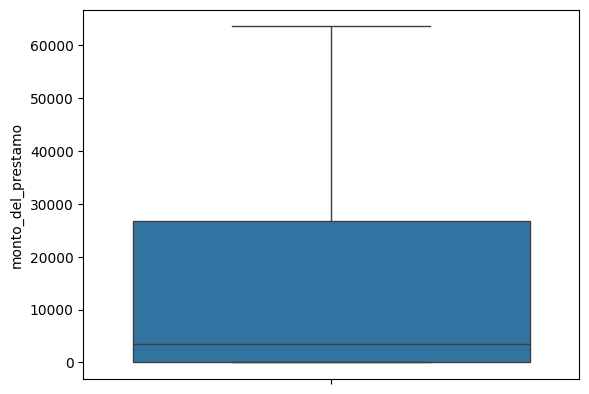

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df["monto_del_prestamo"])

In [23]:
def discretizar_monto(x):
    if x > 25000:
        return "+25000"
    else:
        return "-25000"

df["discreto_monto"] = df["monto_del_prestamo"].apply(discretizar_monto)

In [24]:
df["discreto_monto"].value_counts()

-25000    1390
+25000     516
Name: discreto_monto, dtype: int64

<AxesSubplot: ylabel='edad_del_cliente'>

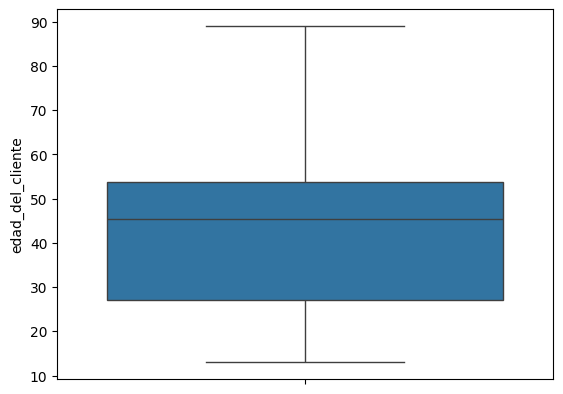

In [25]:
#Con edad del cliente ahora.
sns.boxplot(df["edad_del_cliente"])

In [26]:
df["edad_del_cliente"].mean()

44.57258997823388

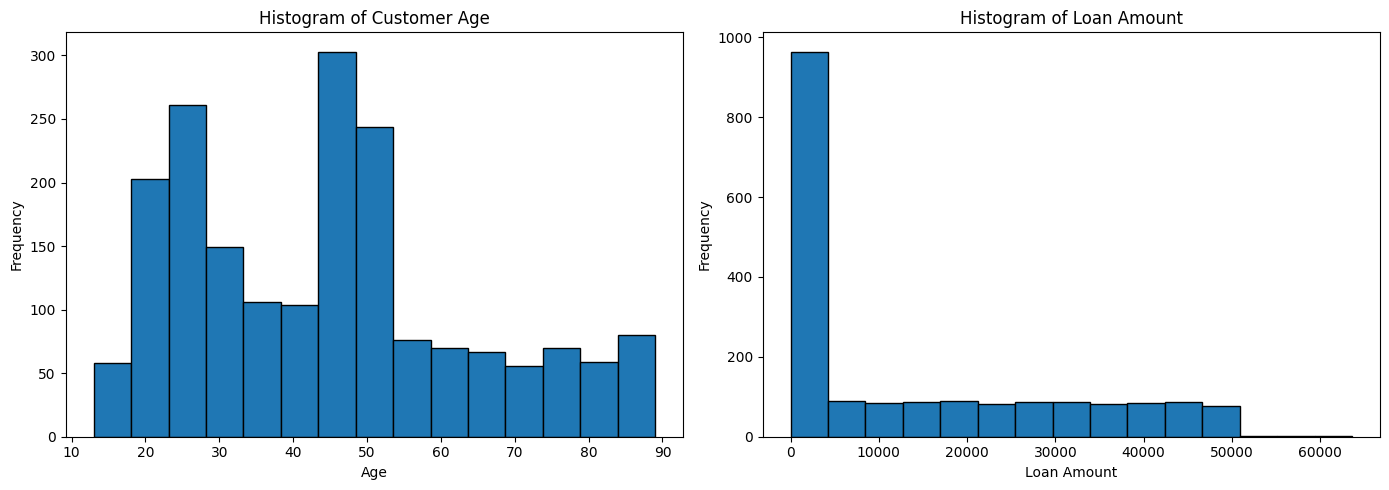

In [52]:
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(14, 5))

# Histogram for customer_age
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['edad_del_cliente'], bins=15, edgecolor='black')
plt.title('Histogram of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for loan_amount
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df['monto_del_prestamo'], bins=15, edgecolor='black')
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


**Parte 2: Análisis Exploratorio de Datos**

*Análisis de sesgos por edad.*
* Usa groupby para calcular la tasa de incumplimiento promedio por grupo de edad.
* Crea histogramas de edad para deudores y no deudores.
* Realiza un t-test para comparar las tasas de incumplimiento entre menores de edad y otros grupos de edad.

*Análisis de sesgos por monto del préstamo.*
* Genera histogramas de 'monto_del_prestamo' para visualizar la distribución de los montos para deudores y no deudores.
* Compara las distribuciones de 'monto_del_prestamo' entre buenos y malos pagadores con un t-test.

*Análisis de sesgos por tipo de empleo.*
* Usa groupby para comparar las tasas de incumplimiento entre diferentes tipos de empleo.
* Explora la relación entre el estado laboral y la tasa de incumplimiento con visualizaciones adecuadas.

Analisis sesgo por edad


In [28]:
tasa_incumplimiento_por_edad = df.groupby('edad_del_cliente')['incumplimiento'].mean()
tasa_incumplimiento_por_edad

edad_del_cliente
13.000000    1.000000
16.000000    1.000000
17.000000    1.000000
18.000000    0.509434
18.124078    1.000000
               ...   
85.000000    0.000000
86.000000    0.000000
87.000000    0.000000
88.000000    0.000000
89.000000    0.000000
Name: incumplimiento, Length: 925, dtype: float64

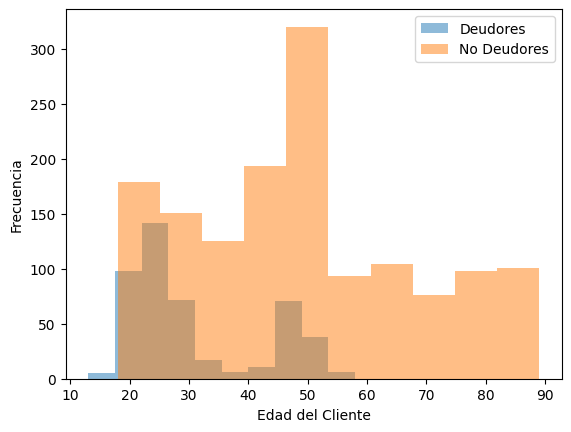

In [29]:
deudores = df[df['incumplimiento'] == 1]
no_deudores = df[df['incumplimiento'] == 0]

plt.hist(deudores['edad_del_cliente'], alpha=0.5, label='Deudores', bins=10)
plt.hist(no_deudores['edad_del_cliente'], alpha=0.5, label='No Deudores', bins=10)

plt.xlabel('Edad del Cliente')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

In [30]:
import pandas as pd
from scipy.stats import ttest_ind

In [32]:
df['edad_del_cliente'].min()

13.0

In [31]:
# Separar los datos en menores de edad y otros grupos de edad
menores_de_edad = df[df['edad_del_cliente'] < 18]
otros_grupos = df[df['edad_del_cliente'] >= 18]

# Realizar el t-test
t_statistic, p_value = ttest_ind(menores_de_edad['incumplimiento'], otros_grupos['incumplimiento'])

# Imprimir los resultados
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula. Las tasas de incumplimiento son diferentes.")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula. No hay diferencias significativas en las tasas de incumplimiento.")

T-Statistic: 3.9499155406572077
P-Value: 8.102685501307224e-05
Hay evidencia significativa para rechazar la hipótesis nula. Las tasas de incumplimiento son diferentes.


C:\Users\cvsob\AppData\Local\Temp\ipykernel_9628\3831294476.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(menores_de_edad['incumplimiento'], otros_grupos['incumplimiento'])


Analisis de sesgo por monto de prestamo


C:\Users\cvsob\AppData\Local\Temp\ipykernel_9628\758276245.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[filtro2]['edad_del_cliente'], label="buen_pagador")
C:\Users\cvsob\AppData\Local\Temp\ipykernel_9628\758276245.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[filtro1]['edad_d

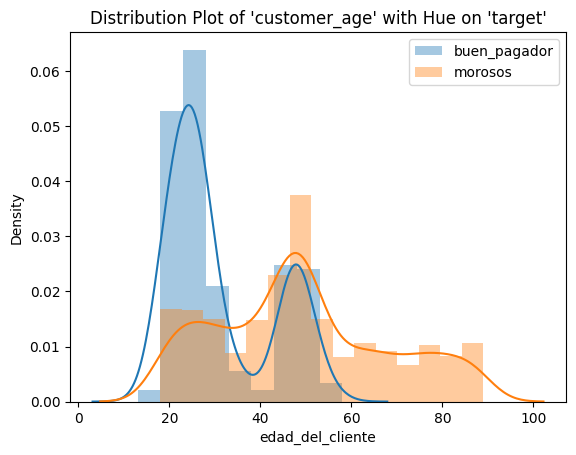

In [50]:
filtro1 = df["incumplimiento"] == 0
filtro2 = df["incumplimiento"] == 1

sns.distplot(df[filtro2]['edad_del_cliente'], label="buen_pagador")
sns.distplot(df[filtro1]['edad_del_cliente'], label="morosos")

plt.title("Distribution Plot of 'customer_age' with Hue on 'target'")
plt.legend()
plt.show()

In [51]:
# Realizar el t-test
t_statistic, p_value = ttest_ind(buenos_pagadores['monto_del_prestamo'], malos_pagadores['monto_del_prestamo'])

# Imprimir los resultados del t-test
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia significativa para rechazar la hipótesis nula. Las distribuciones son diferentes.")
else:
    print("No hay evidencia significativa para rechazar la hipótesis nula. No hay diferencias significativas en las distribuciones.")


T-Statistic: 22.0157995946231
P-Value: 6.9402338508498225e-96
Hay evidencia significativa para rechazar la hipótesis nula. Las distribuciones son diferentes.


*Análisis de sesgos por tipo de empleo.*
* Usa groupby para comparar las tasas de incumplimiento entre diferentes tipos de empleo.
* Explora la relación entre el estado laboral y la tasa de incumplimiento con visualizaciones adecuadas.

In [38]:
tasa_incumplimiento_por_empleo = df.groupby('estatus_laboral')['incumplimiento'].mean()
tasa_incumplimiento_por_empleo

estatus_laboral
Desempleado                 0.875000
Desempleo                   0.000000
Empleo                      0.000000
Empleo a tiempo completo    1.000000
Empleo a tiempo parcial     0.000000
Estudiante                  0.000000
Retirado                    0.000000
child                       0.470588
man                         0.520446
woman                       0.505495
Name: incumplimiento, dtype: float64

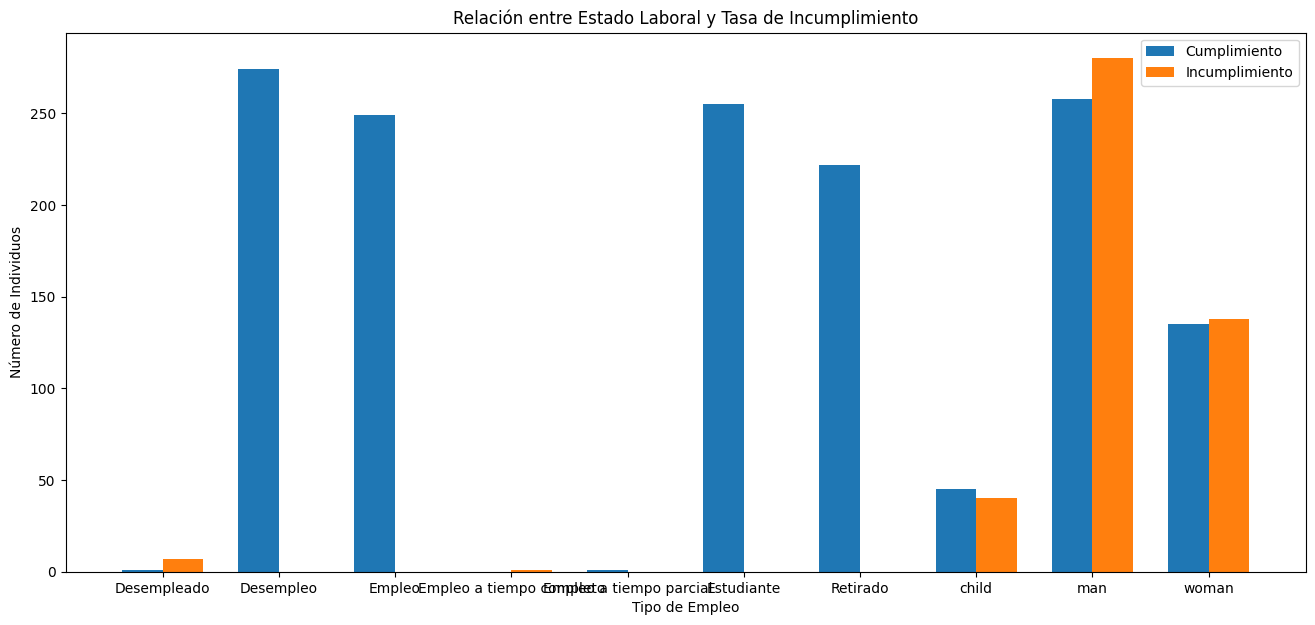

In [48]:
# Crear una tabla de contingencia para contar la frecuencia de incumplimiento por tipo de empleo
tabla_contingencia = pd.crosstab(df['estatus_laboral'], df['incumplimiento'])

# Calcular la tasa de incumplimiento por tipo de empleo
tasa_incumplimiento_por_empleo = tabla_contingencia[1] / (tabla_contingencia[0] + tabla_contingencia[1])

fig, ax = plt.subplots(figsize=(16, 7))
bar_width = 0.35
bar_positions = range(len(tasa_incumplimiento_por_empleo))

ax.bar(bar_positions, tabla_contingencia[0], bar_width, label='Cumplimiento')
ax.bar([p + bar_width for p in bar_positions], tabla_contingencia[1], bar_width, label='Incumplimiento')
ax.set_xlabel('Tipo de Empleo')
ax.set_ylabel('Número de Individuos')
ax.set_title('Relación entre Estado Laboral y Tasa de Incumplimiento')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(tasa_incumplimiento_por_empleo.index)
ax.legend()

plt.show()

**Parte 3: Preparación de Datos para Modelado**
Limpieza de Datos. Asegúrate de que todos los datos estén correctamente codificados y de que no haya valores faltantes o irrelevantes en el conjunto de datos.
Selección de Características. Decide qué variables incluir en el modelo. Considera excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

In [54]:
#si tuviera que incluir en tipo de empleo eliminaria: male - female - empleo - child --> nada que ver con tipo de empleo pero si representan una % grande 
# es al dope ya que es irrelevante

df['estatus_laboral'].value_counts(normalize=True) #si elimina 'man' se me va el 28% del df, ni la usaria como variable


man                         0.282267
Desempleo                   0.143757
woman                       0.143232
Estudiante                  0.133788
Empleo                      0.130640
Retirado                    0.116474
child                       0.044596
Desempleado                 0.004197
Empleo a tiempo parcial     0.000525
Empleo a tiempo completo    0.000525
Name: estatus_laboral, dtype: float64

In [55]:
df.columns

Index(['Unnamed: 0', 'incumplimiento', 'tipo_de_cuenta', 'genero',
       'edad_del_cliente', 'co_solicitantes', 'dependientes',
       'monto_del_prestamo', 'ubicacion_de_sucursal', 'nivel_de_producto',
       'estatus_laboral', 'es_sostenedor_principal',
       'grupo_de_puntaje_crediticio', 'area_residencial',
       'estado_actual_de_la_cuenta', 'tiene_cuenta_conjunta',
       'indicador_aleatorio', 'residencial_Rural', 'residencial_Suburbana',
       'residencial_Urbana', 'discreto_monto'],
      dtype='object')

**Parte 4: Modelado**
Entrenar un Modelo de Clasificación. Utiliza DecisionTreeClassifier para entrenar un modelo predictivo con los datos procesados.
Evaluación del Modelo.
Genera una matriz de confusión para evaluar el rendimiento del modelo.
Calcula la precisión, el recall y la exactitud del modelo.

# Generar modelo

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pydot 
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\ProgramData\Graphviz\bin'

# Features (X) and Target variable (y)
X = df[['tipo_de_cuenta', 'genero', 'edad_del_cliente', 'co_solicitantes', 'dependientes', 'monto_del_prestamo']]
y = df['incumplimiento']  # Assuming 'incumplimiento' is your target variable

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['tipo_de_cuenta', 'genero'], drop_first=True)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating metrics manually using the confusion matrix
tp, fn, fp, tn = conf_matrix.ravel()

# Metrics calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Handling the case where tp + fp is 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0     # Handling the case where tp + fn is 0

# Print the metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Confusion Matrix:
[[269  23]
 [ 28  62]]

Accuracy: 0.8664921465968587
Precision: 0.9057239057239057
Recall: 0.9212328767123288


* Verdaderos positivos (TP): 62
* Verdaderos negativos (TN): 269
* Falsos positivos (FP): 23
* Falsos negativos (FN): 28

**Métricas de Evaluación**:

Exactitud (Accuracy):

La exactitud es la proporción de predicciones correctas en relación con todas las predicciones.
Fórmula: (TP + TN) / (TP + TN + FP + FN)
En tu caso, la exactitud es aproximadamente 0.866 o 86.6%.

Precisión (Precision):

La precisión es la proporción de verdaderos positivos respecto a todas las instancias predichas como positivas.
Fórmula: TP / (TP + FP)
En tu caso, la precisión es aproximadamente 0.906 o 90.6%.

Recall (Sensibilidad o Tasa de Verdaderos Positivos):

El recall es la proporción de verdaderos positivos respecto a todas las instancias reales que son positivas.
Fórmula: TP / (TP + FN)
En tu caso, el recall es aproximadamente 0.921 o 92.1%


Interpretación:

* La exactitud mide la proporción general de predicciones correctas.
* La precisión se centra en la proporción de instancias predichas como positivas que realmente son positivas.
* El recall se centra en la proporción de instancias reales positivas que el modelo ha identificado correctamente.



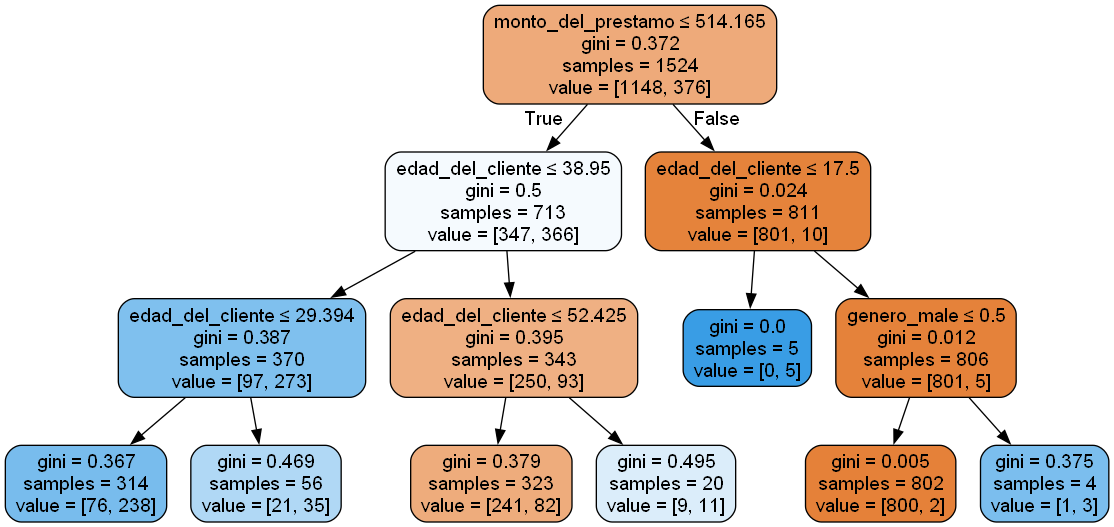

In [69]:
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\ProgramData\Graphviz\bin'

import pydotplus

# Assuming 'clf' is your DecisionTreeClassifier and 'X.columns' is a list of feature names
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

# Create the graph from dot data
graph = graphviz.Source(dot_data)  

# Display the decision tree
Image(graph.render(format='png', engine='dot', cleanup=True))